# Dimensionality reduction in Ruby with shogun

In [1]:
require 'narray'
require 'modshogun'
require 'gnuplot'
require 'csv'

true

In [2]:
csv = CSV.read("bezdekIris.csv", { converters: [:float]})
data = NArray.to_na(csv)
data = data.transpose(1,0)

NArray.object(150,5): 
[ [ 1.4, 1.4, 1.3, 1.5, 1.4, 1.7, 1.4, 1.5, 1.4, 1.5, 1.5, 1.6, 1.4, ... ], 
  [ 3.5, 3.0, 3.2, 3.1, 3.6, 3.9, 3.4, 3.4, 2.9, 3.1, 3.7, 3.4, 3.0, ... ], 
  [ 5.1, 4.9, 4.7, 4.6, 5.0, 5.4, 4.6, 5.0, 4.4, 4.9, 5.4, 4.8, 4.8, ... ], 
  [ 0.2, 0.2, 0.2, 0.2, 0.2, 0.4, 0.3, 0.2, 0.2, 0.1, 0.2, 0.2, 0.1, ... ], 
  [ "Iris-setosa", "Iris-setosa", "Iris-setosa", "Iris-setosa", ... ] ]

In [3]:
features = Modshogun::RealFeatures.new
features.set_feature_matrix(data[true,0..3])

In [12]:
mds_pca = Modshogun::PCA.new
mds_pca.set_target_dim(2)
mds_pca.init(features)
#result = mds_pca.embed(features).get_feature_matrix()
#mds.embed(features).get_feature_matrix()
result = mds_pca.apply_to_feature_matrix(features)

NArray.float(150,2): 
[ [ -0.0142509, -4.12779, -0.114558, -3.92899, 0.0892158, -3.92862, ... ], 
  [ -0.333027, 2.7211, -0.425995, 3.07227, 0.477528, 2.81636, 1.21823, ... ] ]

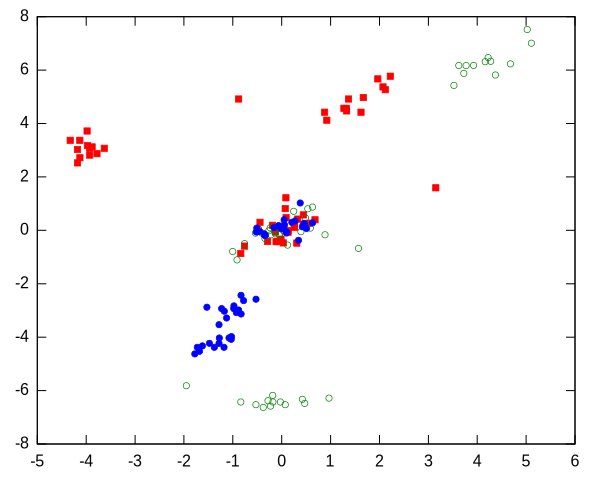

In [13]:
grouped = (result.to_a << data[true,4].to_a).transpose.group_by{|dat| dat[2]}
Gnuplot::Plot.new do |plot|
  plot.data << Gnuplot::DataSet.new(grouped["Iris-setosa"].map{|dat| dat[0..1]}.transpose) do |ds|
    ds.with = "points pt 5 ps 0.7"
    ds.notitle
  end
  plot.data << Gnuplot::DataSet.new(grouped["Iris-versicolor"].map{|dat| dat[0..1]}.transpose) do |ds|
    ds.with = "points pt 6 ps 0.7"
    ds.notitle
  end
  plot.data << Gnuplot::DataSet.new(grouped["Iris-virginica"].map{|dat| dat[0..1]}.transpose) do |ds|
    ds.with = "points pt 7 ps 0.7"
    ds.notitle
  end
end